In [1]:
                                ###EDA Assignment###
#First we will import all the necessary modules and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Now let us take the data in 3 different variables
application= pd.read_csv("application_data.csv") ## We are importing a csv file here
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
prev_app=pd.read_csv("previous_application.csv")
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
## Note- I am usin encoding_errors='replace'..since it replaces every file that couldn't be read in a format readable by the encoder. 
col_desc=pd.read_csv("columns_description.csv",encoding_errors= 'replace')
col_desc.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [4]:
##Printing the shape of all the three columns
print("application- ",application.shape)
print("previous application- ",prev_app.shape)
print("Columns Description Dictionary- ",col_desc.shape)

application-  (307511, 122)
previous application-  (1670214, 37)
Columns Description Dictionary-  (160, 5)


# Application Dataset  (DATA CLEANING)

In [5]:
#Type of data in application Dataset
types_app=application.dtypes
types_app.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [6]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<font color='purple'>
*There are 3 types of data in application dataset-- Float, Int and Object
<br>
*As we can see above, there are various fields where max value is very high from 75 percentile, which indicates that there can be high chance of outliers in those columns.
<br>
*There are 307511 rows and 122 columns in application dataset.</font>

In [7]:
null_=application.isnull().sum()/len(application)*100   ##Percentage of Null values in every column
null50=null_[null_>50]   
null50 ## Displaying values which have null values more than 50 percent
#Dropping values which have more than 50 percent null values, as these will create a huge gap in analysis
#First we should print all the columns which are having null values higher than 50%
print(null50.index)

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')


In [8]:
application=application.drop(columns=(null50.index)) #Dropping columns having values more than 50 percent

<font color='purple'>*After dropping columns which have more than 50 percent null values... no. of columns left should be 81</font>

In [9]:
application   ## We can see that columns left are 81 now.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
application=application.drop(application.loc[application['ORGANIZATION_TYPE']=='XNA'].index) #removing the values which are not defined
application=application.drop(application.loc[application['CODE_GENDER']=='XNA'].index)

In [11]:
null_new=application.isnull().sum()/len(application)*100
null_new[null_new>0] #All the null values which are 

AMT_ANNUITY                      0.004759
AMT_GOODS_PRICE                  0.101534
NAME_TYPE_SUITE                  0.434691
OCCUPATION_TYPE                 16.268001
CNT_FAM_MEMBERS                  0.000793
EXT_SOURCE_2                     0.199895
EXT_SOURCE_3                    19.789556
YEARS_BEGINEXPLUATATION_AVG     48.522010
FLOORSMAX_AVG                   49.519896
YEARS_BEGINEXPLUATATION_MODE    48.522010
FLOORSMAX_MODE                  49.519896
YEARS_BEGINEXPLUATATION_MEDI    48.522010
FLOORSMAX_MEDI                  49.519896
TOTALAREA_MODE                  48.011169
EMERGENCYSTATE_MODE             47.137424
OBS_30_CNT_SOCIAL_CIRCLE         0.336727
DEF_30_CNT_SOCIAL_CIRCLE         0.336727
OBS_60_CNT_SOCIAL_CIRCLE         0.336727
DEF_60_CNT_SOCIAL_CIRCLE         0.336727
DAYS_LAST_PHONE_CHANGE           0.000397
AMT_REQ_CREDIT_BUREAU_HOUR      13.427834
AMT_REQ_CREDIT_BUREAU_DAY       13.427834
AMT_REQ_CREDIT_BUREAU_WEEK      13.427834
AMT_REQ_CREDIT_BUREAU_MON       13

In [12]:
#Let us first check for the values which are more than 40 percent
null40=null_new[null_new>40]
null40

YEARS_BEGINEXPLUATATION_AVG     48.522010
FLOORSMAX_AVG                   49.519896
YEARS_BEGINEXPLUATATION_MODE    48.522010
FLOORSMAX_MODE                  49.519896
YEARS_BEGINEXPLUATATION_MEDI    48.522010
FLOORSMAX_MEDI                  49.519896
TOTALAREA_MODE                  48.011169
EMERGENCYSTATE_MODE             47.137424
dtype: float64

In [13]:
print(null40.index) 
##We can see that all the values are not required for analysis, so we can remove them

Index(['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')


In [14]:
application=application.drop(columns=(null40.index))
application  ##73 columns left

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
null_new=application.isnull().sum()/len(application)*100
null_new_zero=null_new[null_new>0]
null_new_zero

AMT_ANNUITY                    0.004759
AMT_GOODS_PRICE                0.101534
NAME_TYPE_SUITE                0.434691
OCCUPATION_TYPE               16.268001
CNT_FAM_MEMBERS                0.000793
EXT_SOURCE_2                   0.199895
EXT_SOURCE_3                  19.789556
OBS_30_CNT_SOCIAL_CIRCLE       0.336727
DEF_30_CNT_SOCIAL_CIRCLE       0.336727
OBS_60_CNT_SOCIAL_CIRCLE       0.336727
DEF_60_CNT_SOCIAL_CIRCLE       0.336727
DAYS_LAST_PHONE_CHANGE         0.000397
AMT_REQ_CREDIT_BUREAU_HOUR    13.427834
AMT_REQ_CREDIT_BUREAU_DAY     13.427834
AMT_REQ_CREDIT_BUREAU_WEEK    13.427834
AMT_REQ_CREDIT_BUREAU_MON     13.427834
AMT_REQ_CREDIT_BUREAU_QRT     13.427834
AMT_REQ_CREDIT_BUREAU_YEAR    13.427834
dtype: float64

In [16]:
application[null_new_zero.index].describe() #Checking the statistical values of the columns inside null_new_zero

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252121.000000,2.518770e+05,252131.000000,2.516290e+05,202237.000000,251284.000000,251284.000000,251284.000000,251284.000000,252132.000000,218277.000000,218277.000000,218277.000000,218277.000000,218277.000000,218277.000000
mean,27812.449610,5.494077e+05,2.252516,5.161376e-01,0.500345,1.415717,0.139929,1.398649,0.097643,-971.040867,0.006588,0.006977,0.034071,0.281995,0.259812,1.856247
std,14647.829516,3.732695e+05,0.942116,1.899232e-01,0.196005,2.399905,0.441866,2.378390,0.358060,827.308950,0.085094,0.111021,0.202827,0.948357,0.823685,1.826285
min,1980.000000,4.050000e+04,1.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17073.000000,2.475000e+05,2.000000,3.982912e-01,0.357293,0.000000,0.000000,0.000000,0.000000,-1578.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25834.500000,4.500000e+05,2.000000,5.670569e-01,0.522697,0.000000,0.000000,0.000000,0.000000,-763.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35617.500000,6.930000e+05,3.000000,6.638953e-01,0.657784,2.000000,0.000000,2.000000,0.000000,-288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,258025.500000,4.050000e+06,20.000000,8.549997e-01,0.893976,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000


<Axes: >

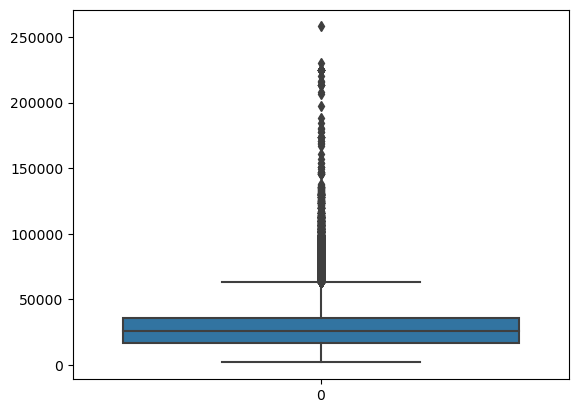

In [17]:
sns.boxplot(application.AMT_ANNUITY) #Since the highest value is much greater so we can replace missing value with median

In [18]:
application.AMT_ANNUITY.median()

25834.5

In [19]:
application.AMT_ANNUITY=application.AMT_ANNUITY.fillna(application.AMT_ANNUITY.median()) # Since max value is much higer than 75th percentile, so we will use median to replace missing values, not mean
application.AMT_GOODS_PRICE=application.AMT_GOODS_PRICE.fillna(application.AMT_GOODS_PRICE.mean()) # There is no outlier, so replacing it with mean
application.CNT_FAM_MEMBERS=application.CNT_FAM_MEMBERS.fillna(application.CNT_FAM_MEMBERS.median()) # Since max value is much higer than 75th percentile, so we will use median to replace missing values, not mean

<font color='purple'>*Now we will see other null values columns 
<br>
*like OCCUPATION_TYPE, EXIT_SOURCE3 etc
 <br>
*Since OCCUPATION_TYPE is a necessary column we can replace missing values with a variable</font>

In [20]:
application.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4651
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

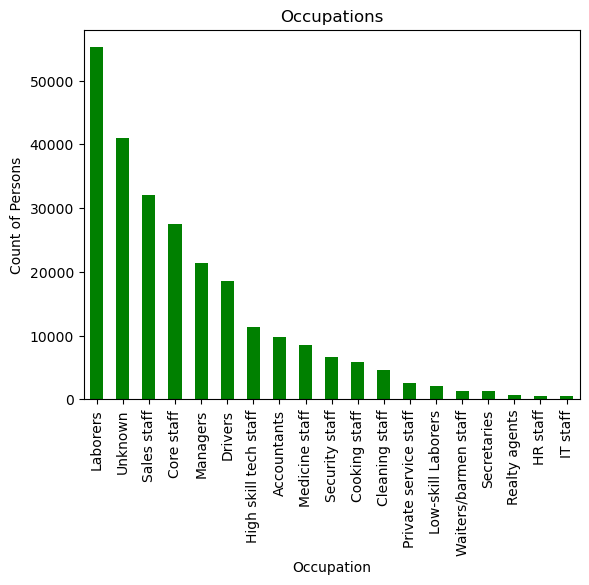

In [21]:
# We are replacing null values with Unknown.
application.OCCUPATION_TYPE=application.OCCUPATION_TYPE.fillna("Unknown")
application.OCCUPATION_TYPE.value_counts().plot.bar(color="green")
plt.title("Occupations")
plt.xlabel("Occupation")
plt.ylabel("Count of Persons")
plt.show()
#We can see below in graph that Unknown composes of highest number in ocupation

In [22]:
#Now we will check for the list of enquires required for CREDIT 
application[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,218277.000000,218277.000000,218277.000000,218277.000000,218277.000000,218277.000000
mean,1.856247,0.259812,0.281995,0.034071,0.006977,0.006588
std,1.826285,0.823685,0.948357,0.202827,0.111021,0.085094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,261.000000,27.000000,8.000000,9.000000,4.000000


<font color='purple'>We can note that all the values, have max much higher than 75%, so we will fill these null values with median</font>

In [23]:
application.AMT_REQ_CREDIT_BUREAU_YEAR=application.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(application.AMT_REQ_CREDIT_BUREAU_YEAR.median())
application.AMT_REQ_CREDIT_BUREAU_QRT=application.AMT_REQ_CREDIT_BUREAU_QRT.fillna(application.AMT_REQ_CREDIT_BUREAU_QRT.median())
application.AMT_REQ_CREDIT_BUREAU_MON=application.AMT_REQ_CREDIT_BUREAU_MON.fillna(application.AMT_REQ_CREDIT_BUREAU_MON.median())
application.AMT_REQ_CREDIT_BUREAU_WEEK=application.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(application.AMT_REQ_CREDIT_BUREAU_WEEK.median())
application.AMT_REQ_CREDIT_BUREAU_DAY=application.AMT_REQ_CREDIT_BUREAU_DAY.fillna(application.AMT_REQ_CREDIT_BUREAU_DAY.median())
application.AMT_REQ_CREDIT_BUREAU_HOUR=application.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(application.AMT_REQ_CREDIT_BUREAU_HOUR.median())

In [24]:
nulls=application.isnull().sum()/len(application)*100
g=nulls[nulls>0]
g

NAME_TYPE_SUITE              0.434691
EXT_SOURCE_2                 0.199895
EXT_SOURCE_3                19.789556
OBS_30_CNT_SOCIAL_CIRCLE     0.336727
DEF_30_CNT_SOCIAL_CIRCLE     0.336727
OBS_60_CNT_SOCIAL_CIRCLE     0.336727
DEF_60_CNT_SOCIAL_CIRCLE     0.336727
DAYS_LAST_PHONE_CHANGE       0.000397
dtype: float64

In [25]:
application[g.index].describe()

,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,2.516290e+05,202237.000000,251284.000000,251284.000000,251284.000000,251284.000000,252132.000000
mean,5.161376e-01,0.500345,1.415717,0.139929,1.398649,0.097643,-971.040867
std,1.899232e-01,0.196005,2.399905,0.441866,2.378390,0.358060,827.308950
min,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,3.982912e-01,0.357293,0.000000,0.000000,0.000000,0.000000,-1578.000000
50%,5.670569e-01,0.522697,0.000000,0.000000,0.000000,0.000000,-763.000000
75%,6.638953e-01,0.657784,2.000000,0.000000,2.000000,0.000000,-288.000000
max,8.549997e-01,0.893976,348.000000,34.000000,344.000000,24.000000,0.000000


In [26]:
application.OBS_30_CNT_SOCIAL_CIRCLE=application.OBS_30_CNT_SOCIAL_CIRCLE.fillna(application.OBS_30_CNT_SOCIAL_CIRCLE.median())
application.DEF_30_CNT_SOCIAL_CIRCLE=application.DEF_30_CNT_SOCIAL_CIRCLE.fillna(application.DEF_30_CNT_SOCIAL_CIRCLE.median())
application.OBS_60_CNT_SOCIAL_CIRCLE=application.OBS_60_CNT_SOCIAL_CIRCLE.fillna(application.OBS_60_CNT_SOCIAL_CIRCLE.median())
application.DEF_60_CNT_SOCIAL_CIRCLE=application.DEF_60_CNT_SOCIAL_CIRCLE.fillna(application.DEF_60_CNT_SOCIAL_CIRCLE.median())
application.CNT_FAM_MEMBERS=application.CNT_FAM_MEMBERS.fillna(application.CNT_FAM_MEMBERS.median())
nulls=application.isnull().sum()/len(application)*100
g=nulls[nulls>0]
print(g.index)

Index(['NAME_TYPE_SUITE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')


In [27]:
application=application.drop(columns=(g.index)) #From my understanding, these values were not needed for analysis, so we decided to drop them.

#### Application dataset Analysis ( Identifying Outliers and Standerdising certain values)

In [28]:
nulls=application.isnull().sum()/len(application)*100
nulls[nulls>0]
#No null values are left in application dataset, now we can do the required analysis.

Series([], dtype: float64)

In [29]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252133.000000,252133.000000,252133.000000,2.521330e+05,2.521330e+05,252133.000000,2.521330e+05,252133.000000,252133.000000,252133.000000,...,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000
mean,278115.872266,0.086601,0.498511,1.759139e+05,6.114018e+05,27812.355471,5.494077e+05,0.020894,-14769.152336,-2384.142254,...,0.009836,0.000710,0.000615,0.000409,0.005703,0.006040,0.029496,0.244129,0.224925,1.741271
std,102815.584842,0.281250,0.763159,2.588536e+05,4.065294e+05,14647.487292,3.730799e+05,0.013874,3662.562670,2338.327666,...,0.098688,0.026635,0.024787,0.020208,0.079207,0.103325,0.189076,0.887613,0.771493,1.724147
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25200.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189036.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,2.475000e+05,0.010006,-17563.000000,-3175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278065.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,4.500000e+05,0.018850,-14573.000000,-1648.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367166.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,6.930000e+05,0.028663,-11775.000000,-767.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000


<font color='purple'>We can see that columns AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE are having very high numbers, so we need to standerdise them and the columns like DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION, DAYS_ID_PUBLISH are having negative values, so we need to convert them to their absolute values. </font>

In [30]:
Columns_having_high_values=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_GOODS_PRICE"]
Columns_having_negative_values=["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]
application['AMT_INCOME_TOTAL']=application['AMT_INCOME_TOTAL']/10000
application['AMT_CREDIT']=application['AMT_CREDIT']/10000
application['AMT_GOODS_PRICE']=application['AMT_GOODS_PRICE']/10000
application[Columns_having_negative_values]=abs(application[Columns_having_negative_values])
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,...,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000
mean,278115.872266,0.086601,0.498511,17.591390,61.140182,27812.355471,54.940769,0.020894,14769.152336,2384.142254,...,0.009836,0.000710,0.000615,0.000409,0.005703,0.006040,0.029496,0.244129,0.224925,1.741271
std,102815.584842,0.281250,0.763159,25.885358,40.652937,14647.487292,37.307994,0.013874,3662.562670,2338.327666,...,0.098688,0.026635,0.024787,0.020208,0.079207,0.103325,0.189076,0.887613,0.771493,1.724147
min,100002.000000,0.000000,0.000000,2.565000,4.500000,1980.000000,4.050000,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189036.000000,0.000000,0.000000,11.250000,27.796950,17073.000000,24.750000,0.010006,11775.000000,767.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278065.000000,0.000000,0.000000,15.750000,52.128000,25834.500000,45.000000,0.018850,14573.000000,1648.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367166.000000,0.000000,1.000000,21.150000,82.922400,35617.500000,69.300000,0.028663,17563.000000,3175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,11700.000000,405.000000,258025.500000,405.000000,0.072508,25200.000000,17912.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000


<font color='purple'> Now we will convert DAYS_BIRTH,DAYS_EMPLOYED in years..and AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE in lakhs </font>

In [31]:
application["AGE"] = application["DAYS_BIRTH"]/365
application["Age_of_client"]=pd.cut(application.AGE,[0,20,25,30,35,40,45,50,55,60,65,100],["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-100"])
application["Age_of_client"].head()

0    (25, 30]
1    (45, 50]
2    (50, 55]
3    (50, 55]
4    (50, 55]
Name: Age_of_client, dtype: category
Categories (11, interval[int64, right]): [(0, 20] < (20, 25] < (25, 30] < (30, 35] ... (50, 55] < (55, 60] < (60, 65] < (65, 100]]

In [32]:
application["Exp"]=application["DAYS_EMPLOYED"]/365
application["Experience_of_client"]=pd.cut(application.Exp,[0,1,2,3,4,5,6,100],["1","2","3","4","5","6","6 & Above"])
application["Experience_of_client"].head()

0      (1, 2]
1      (3, 4]
2      (0, 1]
3    (6, 100]
4    (6, 100]
Name: Experience_of_client, dtype: category
Categories (7, interval[int64, right]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5] < (5, 6] < (6, 100]]

Outlier Columns

In [33]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,Exp
count,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,...,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000
mean,278115.872266,0.086601,0.498511,17.591390,61.140182,27812.355471,54.940769,0.020894,14769.152336,2384.142254,...,0.000615,0.000409,0.005703,0.006040,0.029496,0.244129,0.224925,1.741271,40.463431,6.531897
std,102815.584842,0.281250,0.763159,25.885358,40.652937,14647.487292,37.307994,0.013874,3662.562670,2338.327666,...,0.024787,0.020208,0.079207,0.103325,0.189076,0.887613,0.771493,1.724147,10.034418,6.406377
min,100002.000000,0.000000,0.000000,2.565000,4.500000,1980.000000,4.050000,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189036.000000,0.000000,0.000000,11.250000,27.796950,17073.000000,24.750000,0.010006,11775.000000,767.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,32.260274,2.101370
50%,278065.000000,0.000000,0.000000,15.750000,52.128000,25834.500000,45.000000,0.018850,14573.000000,1648.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.926027,4.515068
75%,367166.000000,0.000000,1.000000,21.150000,82.922400,35617.500000,69.300000,0.028663,17563.000000,3175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,48.117808,8.698630
max,456255.000000,1.000000,19.000000,11700.000000,405.000000,258025.500000,405.000000,0.072508,25200.000000,17912.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000,69.041096,49.073973


In [34]:
# For application['AMT_GOODS_PRICE']

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application['AMT_GOODS_PRICE_RANGE']=pd.cut(application['AMT_GOODS_PRICE'],bins=bins,labels=slots)
application['AMT_GOODS_PRICE_RANGE'].head()

0    10L Above
1          NaN
2    10L Above
3    10L Above
4    10L Above
Name: AMT_GOODS_PRICE_RANGE, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L Above']

In [35]:
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application['AMT_INCOME_TOTAL_RANGE']=pd.cut(application['AMT_INCOME_TOTAL'],bins=bins,labels=slots)
application['AMT_INCOME_TOTAL_RANGE'].head()

0    10L Above
1    10L Above
2        6L-7L
3    10L Above
4    10L Above
Name: AMT_INCOME_TOTAL_RANGE, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L Above']

In [36]:
bins = [0,1,2,3,4,5,6,7,8,9,10,1000]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

application['AMT_CREDIT_RANGE']=pd.cut(application['AMT_CREDIT'],bins=bins,labels=slots)
application['AMT_CREDIT_RANGE'].head()


0    10L Above
1    10L Above
2    10L Above
3    10L Above
4    10L Above
Name: AMT_CREDIT_RANGE, dtype: category
Categories (11, object): ['0-1L' < '1L-2L' < '2L-3L' < '3L-4L' ... '7L-8L' < '8L-9L' < '9L-10L' < '10L Above']

<font color='red'>Identifying Outliers</font>

In [37]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,Exp
count,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,...,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000,252133.000000
mean,278115.872266,0.086601,0.498511,17.591390,61.140182,27812.355471,54.940769,0.020894,14769.152336,2384.142254,...,0.000615,0.000409,0.005703,0.006040,0.029496,0.244129,0.224925,1.741271,40.463431,6.531897
std,102815.584842,0.281250,0.763159,25.885358,40.652937,14647.487292,37.307994,0.013874,3662.562670,2338.327666,...,0.024787,0.020208,0.079207,0.103325,0.189076,0.887613,0.771493,1.724147,10.034418,6.406377
min,100002.000000,0.000000,0.000000,2.565000,4.500000,1980.000000,4.050000,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,189036.000000,0.000000,0.000000,11.250000,27.796950,17073.000000,24.750000,0.010006,11775.000000,767.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,32.260274,2.101370
50%,278065.000000,0.000000,0.000000,15.750000,52.128000,25834.500000,45.000000,0.018850,14573.000000,1648.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.926027,4.515068
75%,367166.000000,0.000000,1.000000,21.150000,82.922400,35617.500000,69.300000,0.028663,17563.000000,3175.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,48.117808,8.698630
max,456255.000000,1.000000,19.000000,11700.000000,405.000000,258025.500000,405.000000,0.072508,25200.000000,17912.000000,...,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,23.000000,69.041096,49.073973


<font color='purple'> We can see that the values which have max value very high than 75 percentile are maybe having outliers. These values are CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED </font>

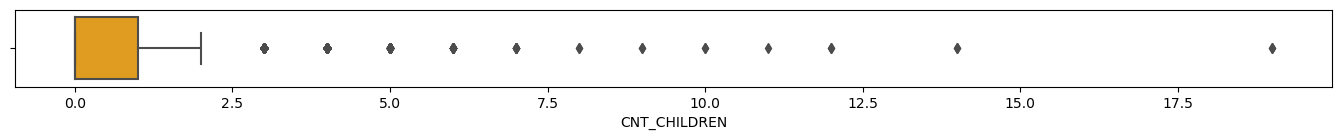

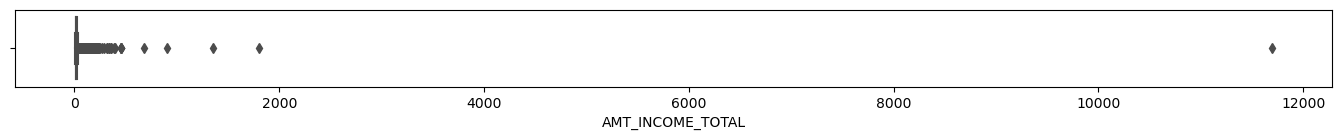

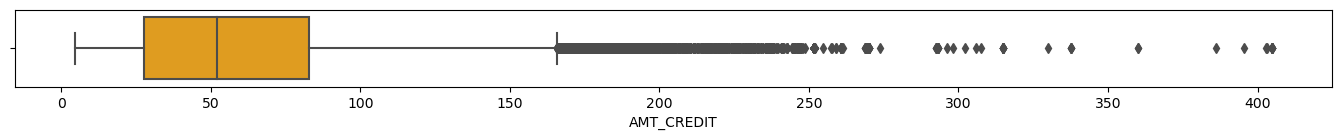

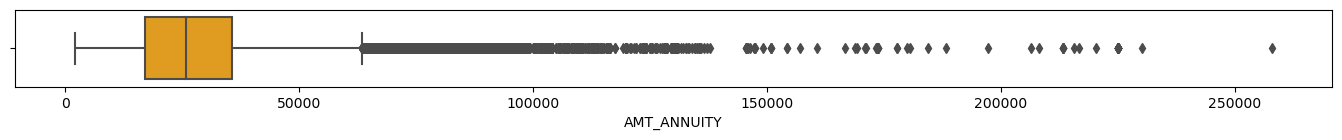

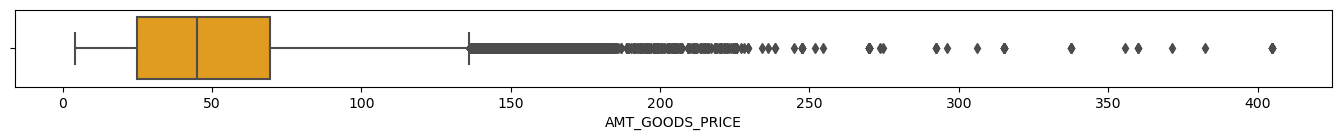

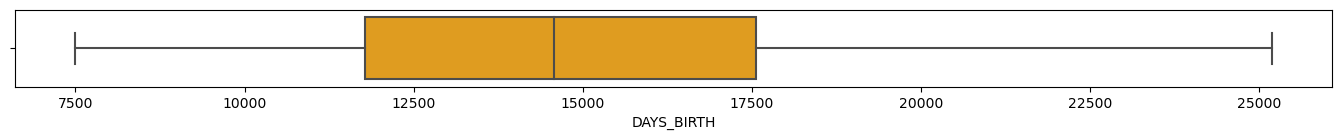

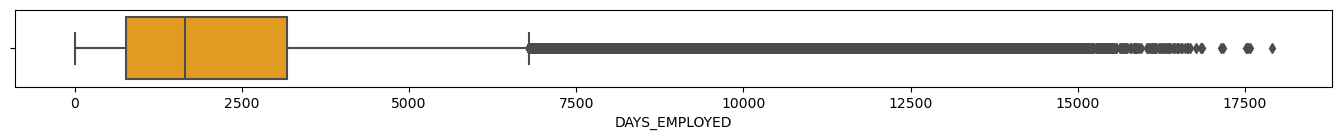

In [38]:
import matplotlib.pyplot as plt
outliers_col=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED']
for i in outliers_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=application, x=i, color='orange')

## Numerical Univariate Analysis

<font style="color:purple;font-weight:700;font-size:15px">
These boxplots can also act as Numerical Univariate Analysis</font>
<br>
As we can see the outliers for numerical columns of application i.e. AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTTAL,AMT_GOODS_PRICE telling us that which boxplot lie more in which quadrant
<br>
<font color='blue'>
1.) The third quartile is very slim for AMT_INCOME_TOTAL<br>
2.) The third quartile is bigger than the first quartile for Credit Amount, which means most of the Credit of the Clients are present in third quartile <br>
3.)Similarly most of the annuity clients are from thied quartile</font>

#### Boxplot Observations:
1.)AMT_INCOME_TOTAL-- is having outlier, which is okay as we may have clients who are having high income and because of that        AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE are also having outliers, as the clients who are having income, will be having high      annuity and credit and thus high goods price.
<br>
2.)DAYS_BIRTH is not having any outlier, which is fine.
<br>
3.)DAYS_EMPLOYED is not having outlier as we can have employees with high experience, as we have many old people too, with very    high income also.
<br>
4.)CNT_CHILDREN is having outliers, which is fine as people can have any number of children.

## Categorical and Numerical Columns

<font color='purple'> Now we will differentiate between categorical and numerical columns with some function 
<br>
And first we will see the distribution of Target variable having 1 and 0 values.
<br>
Acc. to description we have:
Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases).
    <br>
So let us name 1 with non-payer and 0 with payer.
</font>

In [39]:
cat_col = list(application.select_dtypes(["category"]).columns)   # Cat columns list
num_col = list(application.select_dtypes(["int","float"]).columns)  # Num Column list

application.TARGET.value_counts(normalize=True)

TARGET
0    0.913399
1    0.086601
Name: proportion, dtype: float64

## Data Imbalance

Text(0.5, 1.0, 'Distribution of Target: Payer and Non-Payer')

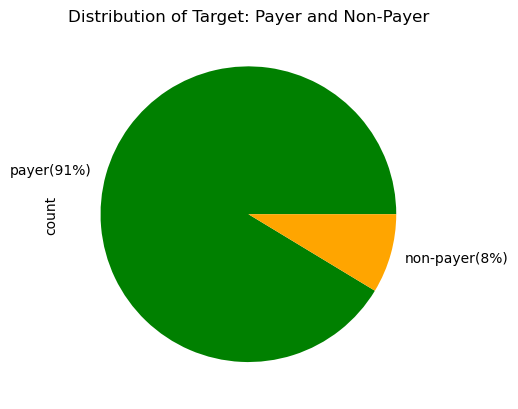

In [40]:
application.TARGET.value_counts().plot.pie(colors=['green','orange'], labels=['payer(91%)','non-payer(8%)'])
plt.title("Distribution of Target: Payer and Non-Payer")


In [41]:
application.CODE_GENDER.value_counts()

CODE_GENDER
F    157177
M     94956
Name: count, dtype: int64

<font color='purple'>One main criteria on which we can distinguish is Male and Female in our application data </font>


Females are 202448 in number and Males are 105059 in number


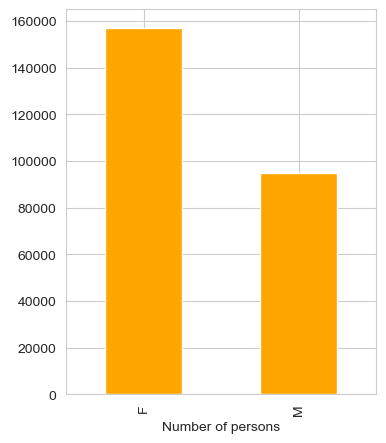

In [59]:
Gender_count=[202448,105059,0]
Gender=["Male","Female"]
plt.figure(figsize=(4,5))
fig=application.CODE_GENDER.value_counts().plot.bar(color='orange')
fig.set_xlabel("Number of persons")
print("Females are 202448 in number and Males are 105059 in number")

<font style="color:grey;font-weight:700;font-size:15px">We will make 2 dataframes now, one for Target 0, the people who can pay without any difficulty, other for Target 1 - who have difficulty in paying </font>

In [43]:
target_0= application[application["TARGET"]==0]
target_1=application[application["TARGET"]==1]

## Univariate Categorical  Analysis

<font style="color:purple;font-weight:700;font-size:15px">Income of the client</font>


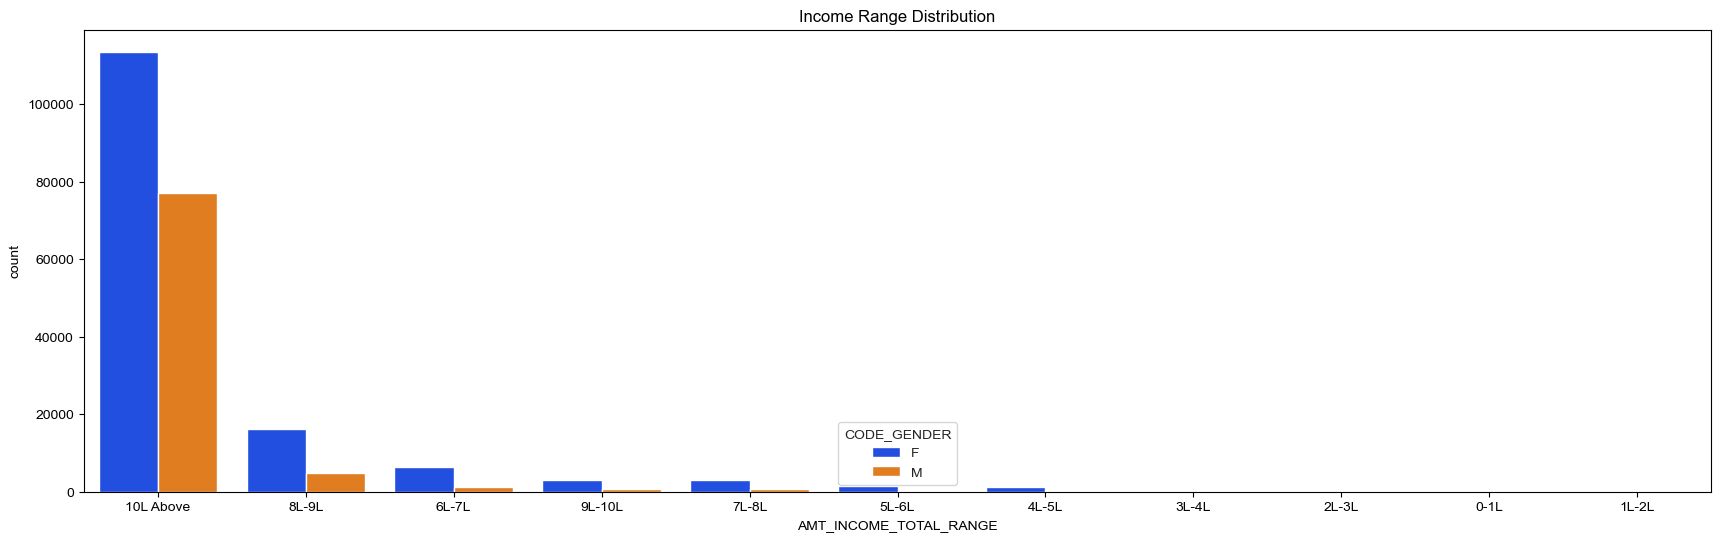

Observations For Target 0:
We can see that females count is higher in having credit compare to males
Most of the people having credit are earning 10L and above


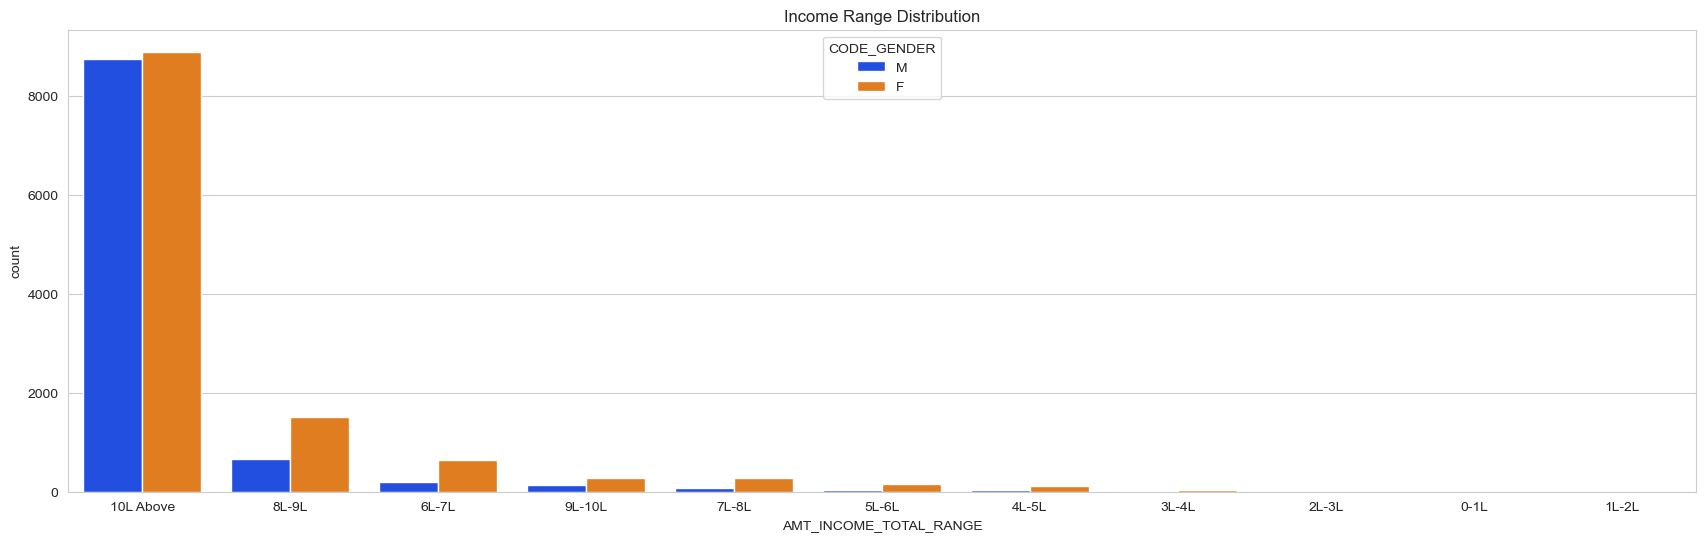

Observations For Target 1:
Females count is higher in having credit compare to males
Most of the people having credit with paying difficulty are earning 10L and above
Max count is very less compared to the max count for Target 0


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()
sns.set_style('whitegrid') # setting one of the 5 seaborn themes.( Displays a white background with gridlines)
temp = pd.Series(data ='CODE_GENDER') #creates a pandas Series with ‘CODE_GENDER’ as the data
width = len(target_0['AMT_INCOME_TOTAL_RANGE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 6)
ax = sns.countplot(data = target_0, x='AMT_INCOME_TOTAL_RANGE' ,order=target_0['AMT_INCOME_TOTAL_RANGE'].value_counts().index,hue = 'CODE_GENDER',palette='bright') 
plt.title('Income Range Distribution')
plt.show()
print("Observations For Target 0:")
print("We can see that females count is higher in having credit compare to males")
print("Most of the people having credit are earning 10L and above")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()
sns.set_style('whitegrid') # setting one of the 5 seaborn themes.( Displays a white background with gridlines)
temp = pd.Series(data ='CODE_GENDER') #creates a pandas Series with ‘CODE_GENDER’ as the data
width = len(target_1['AMT_INCOME_TOTAL_RANGE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 6)
ax = sns.countplot(data = target_1, x='AMT_INCOME_TOTAL_RANGE' ,order=target_1['AMT_INCOME_TOTAL_RANGE'].value_counts().index,hue = 'CODE_GENDER',palette='bright') 
plt.title('Income Range Distribution')
plt.show()
print("Observations For Target 1:")
print("Females count is higher in having credit compare to males")
print("Most of the people having credit with paying difficulty are earning 10L and above")
print("Max count is very less compared to the max count for Target 0")

<font style="color:purple;font-weight:700;font-size:15px">Contract Type of the Client: Cash Loan or Revolving Loan(Credit)</font>

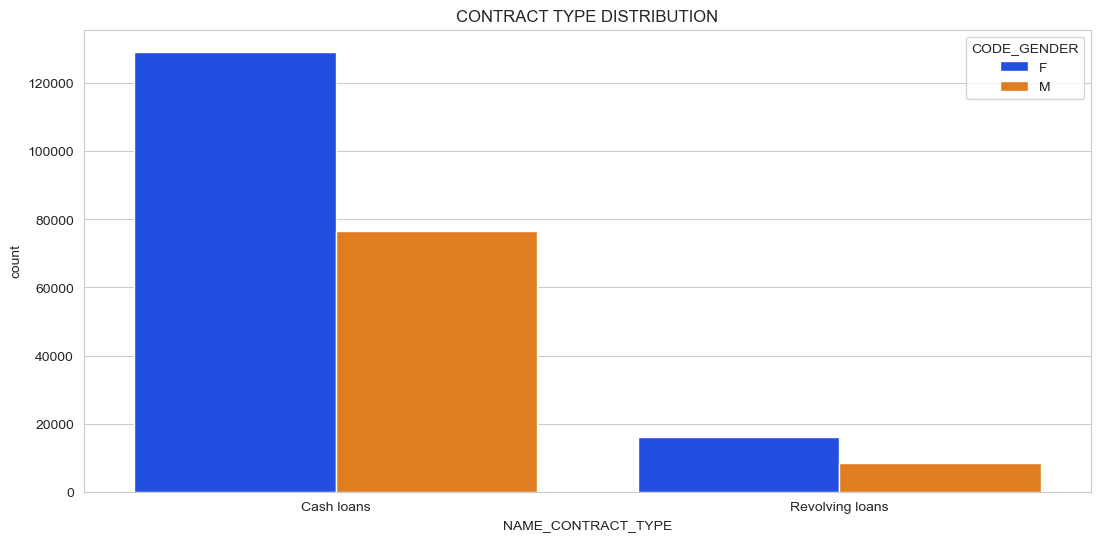

Observations For Target 0:
We can see that females count is higher in both type of loans
Most of the people prefer Casg Loans


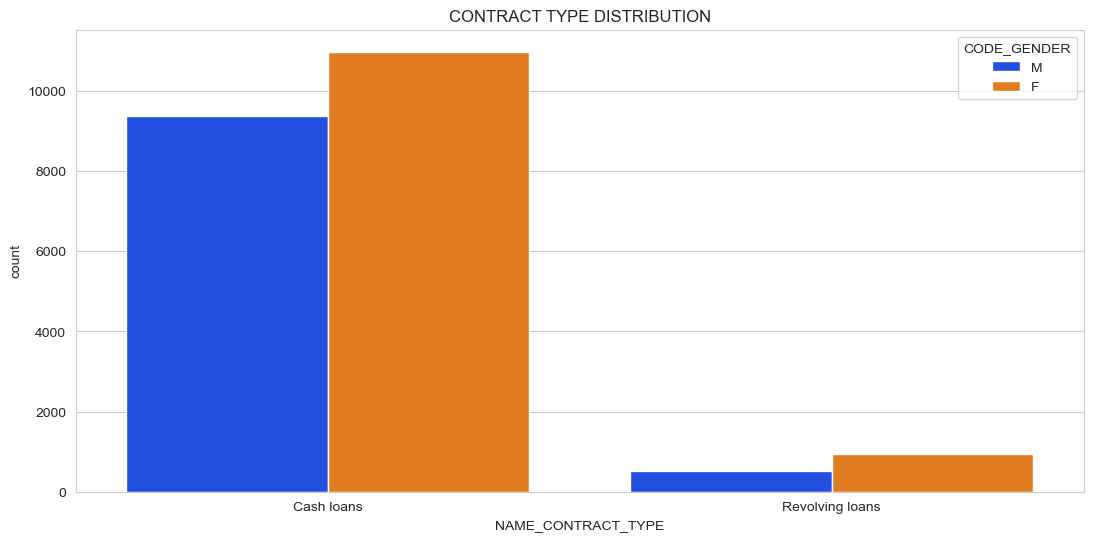

Observations For Target 1:
Females count is higher here as well
Most of the people having credit with paying difficulty are also taking cash loans
Revolving loan is taken by very few males


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()
sns.set_style('whitegrid') # setting one of the 5 seaborn themes.( Displays a white background with gridlines)
temp = pd.Series(data ='CODE_GENDER') #creates a pandas Series with ‘CODE_GENDER’ as the data
width = len(target_0['NAME_CONTRACT_TYPE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 6)
ax = sns.countplot(data = target_0, x='NAME_CONTRACT_TYPE' ,order=target_0['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='bright') 
plt.title('CONTRACT TYPE DISTRIBUTION')
plt.show()
print("Observations For Target 0:")
print("We can see that females count is higher in both type of loans")
print("Most of the people prefer Casg Loans")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()
sns.set_style('whitegrid') # setting one of the 5 seaborn themes.( Displays a white background with gridlines)
temp = pd.Series(data ='CODE_GENDER') #creates a pandas Series with ‘CODE_GENDER’ as the data
width = len(target_1['NAME_CONTRACT_TYPE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 6)
ax = sns.countplot(data = target_1, x='NAME_CONTRACT_TYPE' ,order=target_1['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='bright') 
plt.title('CONTRACT TYPE DISTRIBUTION')
plt.show()
print("Observations For Target 1:")
print("Females count is higher here as well")
print("Most of the people having credit with paying difficulty are also taking cash loans")
print("Revolving loan is taken by very few males")

<font style="color:purple;font-weight:700;font-size:15px">Flag Own REALTY: Whether that person has his/her own house or not</font>

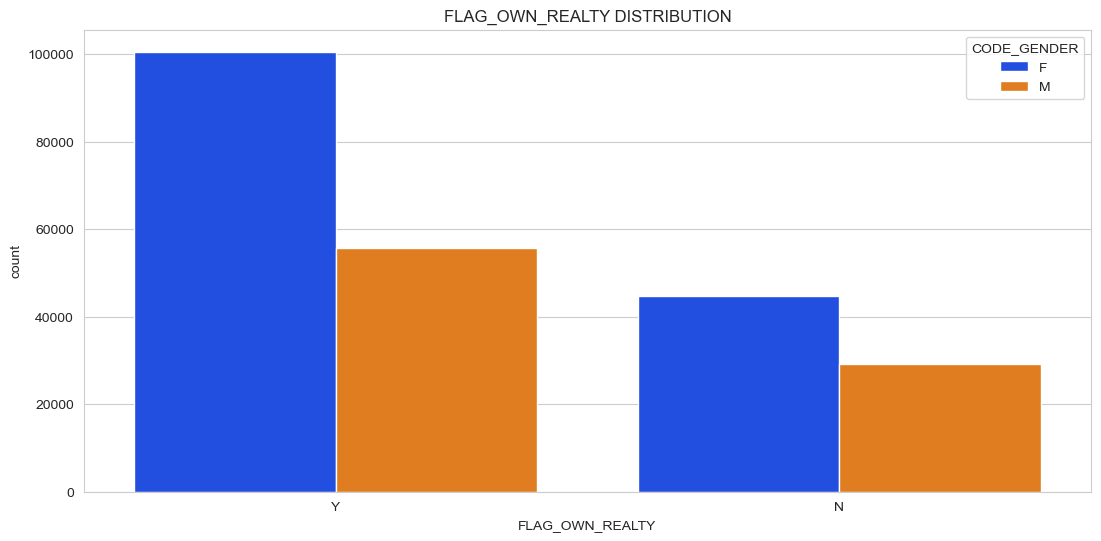

Observations For Target 0:
Most of the people don't have their house, still they are able to pay on time
Most of the people who have their own real_estate are double than the people who don't have


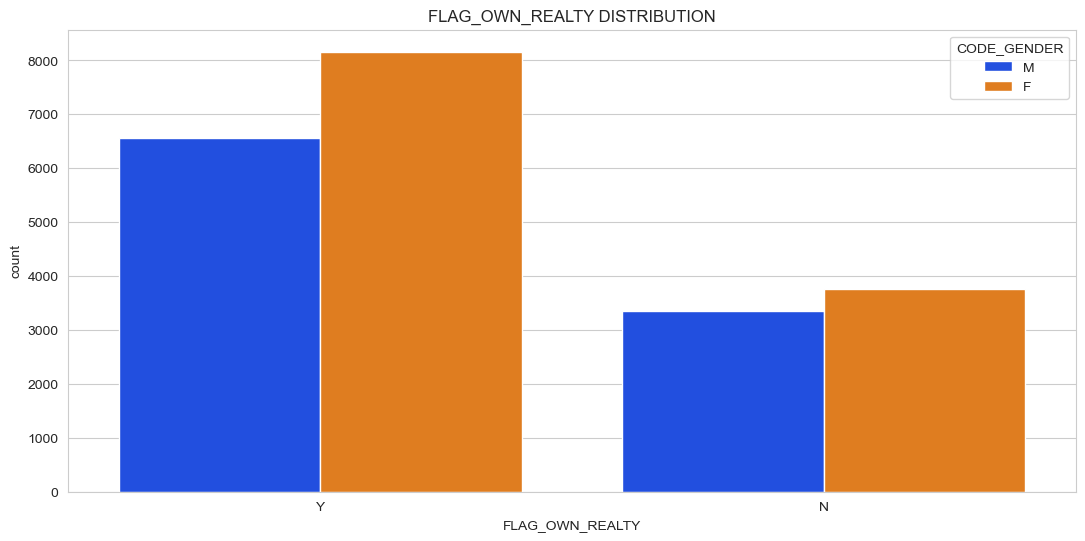

Observations For Target 1:
Females count is higher here as well
Most of the people who have their house, still they are defaulters
We can conclude that their is no correlation between owning a house and paying on time


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()
sns.set_style('whitegrid') # setting one of the 5 seaborn themes.( Displays a white background with gridlines)
temp = pd.Series(data ='CODE_GENDER') #creates a pandas Series with ‘CODE_GENDER’ as the data
width = len(target_0['FLAG_OWN_REALTY'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 6)
ax = sns.countplot(data = target_0, x='FLAG_OWN_REALTY' ,order=target_0['FLAG_OWN_REALTY'].value_counts().index,hue = 'CODE_GENDER',palette='bright') 
plt.title('FLAG_OWN_REALTY DISTRIBUTION')
plt.show()
print("Observations For Target 0:")
print("Most of the people don't have their house, still they are able to pay on time")
print("Most of the people who have their own real_estate are double than the people who don't have")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()
sns.set_style('whitegrid') # setting one of the 5 seaborn themes.( Displays a white background with gridlines)
temp = pd.Series(data ='CODE_GENDER') #creates a pandas Series with ‘CODE_GENDER’ as the data
width = len(target_1['FLAG_OWN_REALTY'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 6)
ax = sns.countplot(data = target_1, x='FLAG_OWN_REALTY' ,order=target_1['FLAG_OWN_REALTY'].value_counts().index,hue = 'CODE_GENDER',palette='bright') 
plt.title('FLAG_OWN_REALTY DISTRIBUTION')
plt.show()
print("Observations For Target 1:")
print("Females count is higher here as well")
print("Most of the people who have their house, still they are defaulters")
print("We can conclude that their is no correlation between owning a house and paying on time")

<font style="color:purple;font-weight:700;font-size:15px">Type of Income Client has</font>

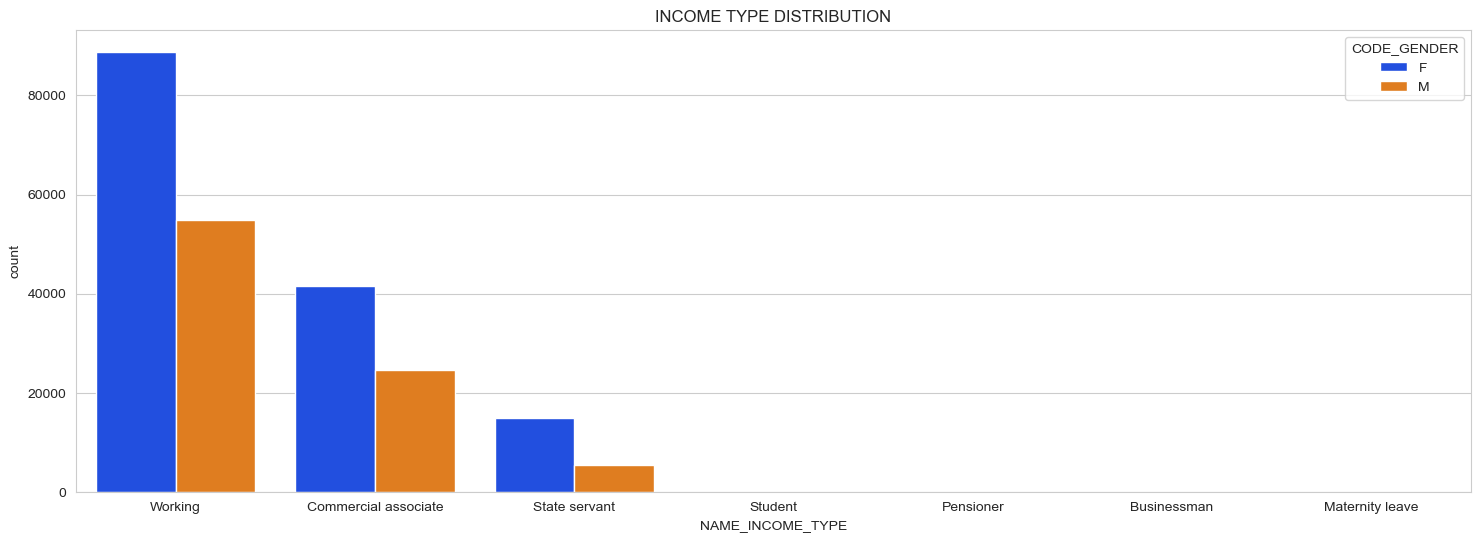

Observations For Target 0:
Most of the people come from working background followed by commercial associate


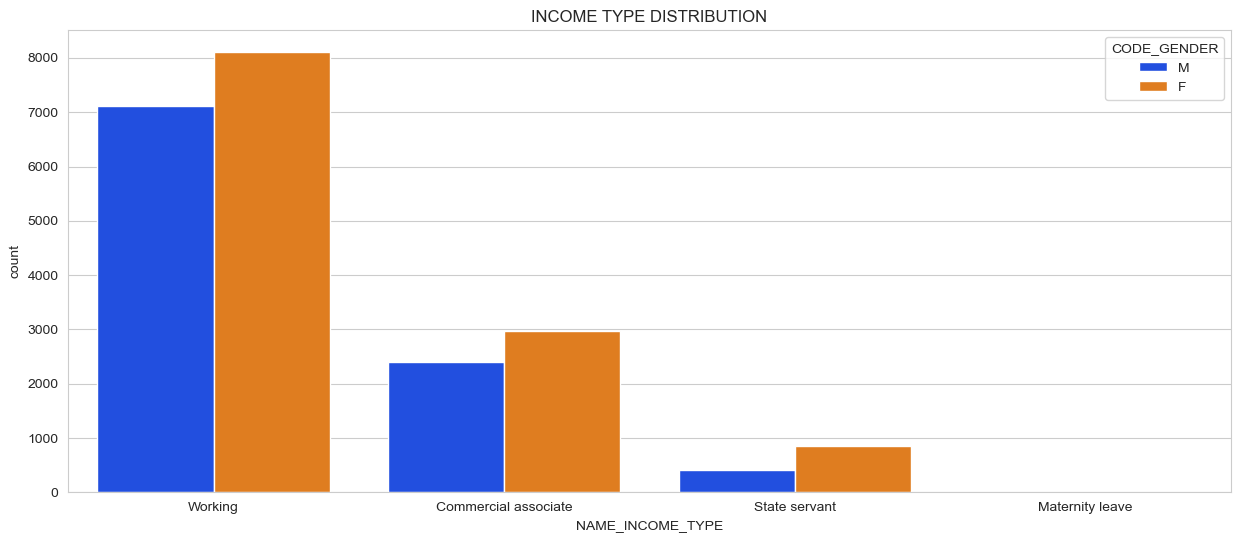

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()
sns.set_style('whitegrid') # setting one of the 5 seaborn themes.( Displays a white background with gridlines)
temp = pd.Series(data ='CODE_GENDER') #creates a pandas Series with ‘CODE_GENDER’ as the data
width = len(target_0['NAME_INCOME_TYPE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 6)
ax = sns.countplot(data = target_0, x='NAME_INCOME_TYPE' ,order=target_0['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='bright') 
plt.title('INCOME TYPE DISTRIBUTION')
plt.show()
print("Observations For Target 0:")
print("Most of the people come from working background followed by commercial associate")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
fig, ax = plt.subplots()
sns.set_style('whitegrid') # setting one of the 5 seaborn themes.( Displays a white background with gridlines)
temp = pd.Series(data ='CODE_GENDER') #creates a pandas Series with ‘CODE_GENDER’ as the data
width = len(target_1['NAME_INCOME_TYPE'].unique()) + 7 + 4*len(temp.unique())
fig.set_size_inches(width , 6)
ax = sns.countplot(data = target_1, x='NAME_INCOME_TYPE' ,order=target_1['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='bright') 
plt.title('INCOME TYPE DISTRIBUTION')
plt.show()

## Univariate Numerical Analysis

#### CORRELATION

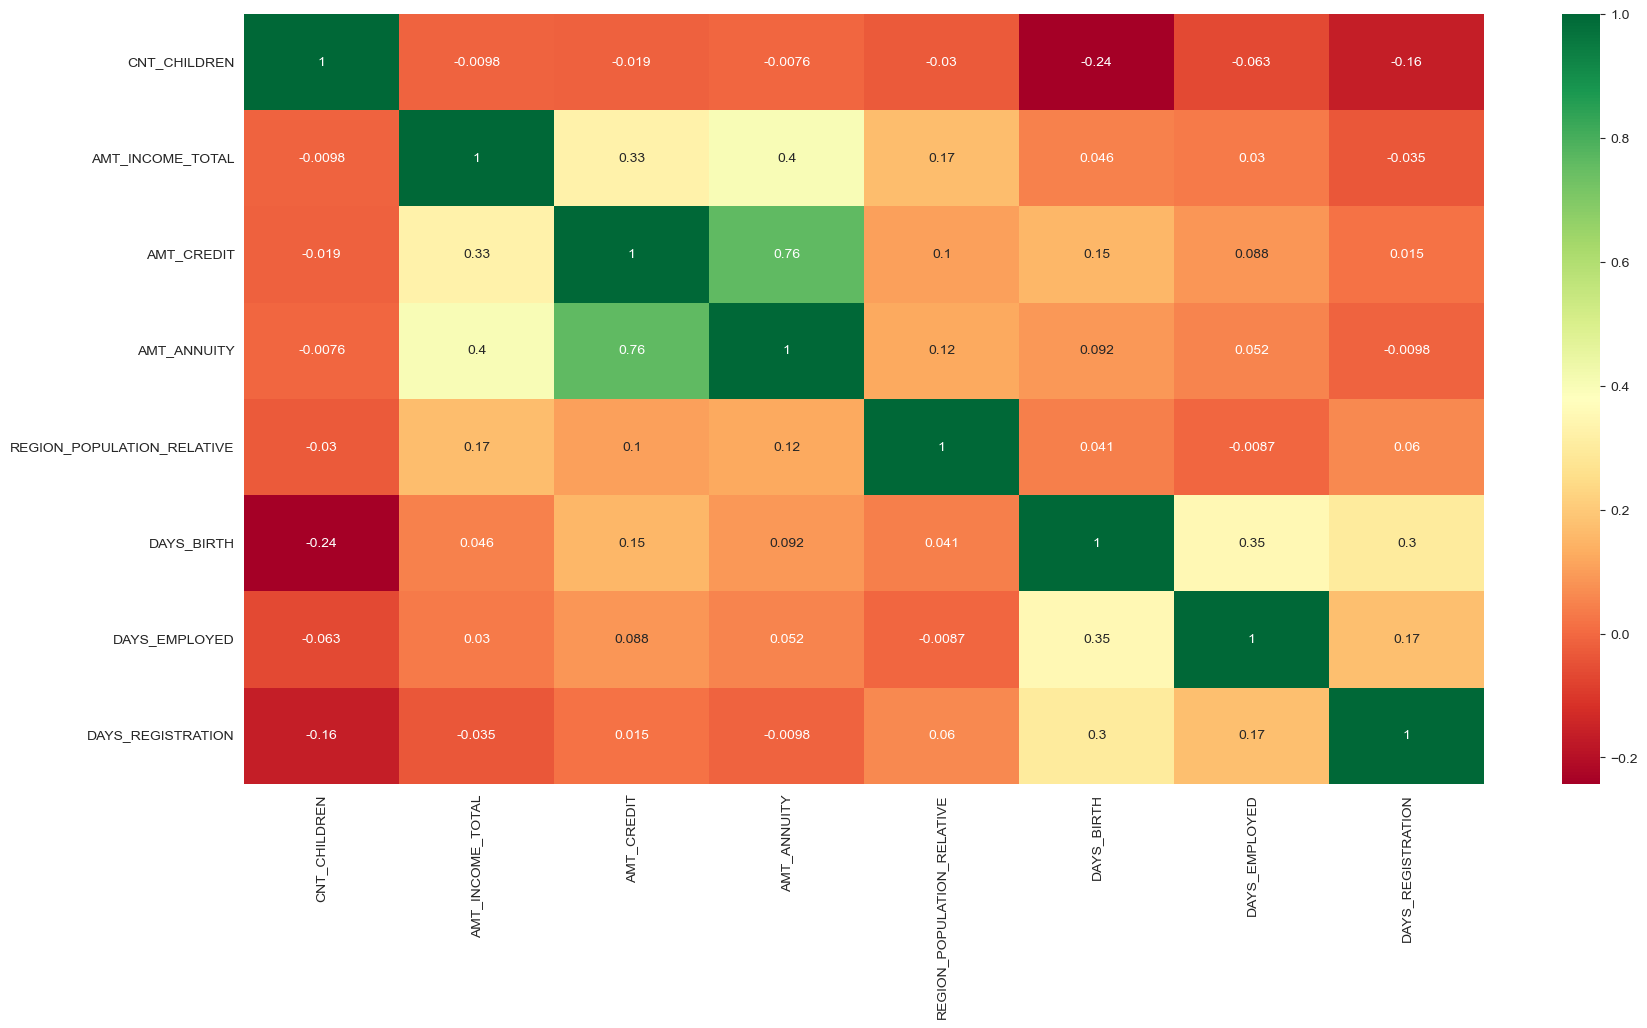

Observations:
Amt_Income_Total  is not that much connected to Days_Employed, which means that no. of days employed is not much related to Income earned by that person
CNT_Children is inversely proprtional to DAYS_BIRTH, which means old people have less children
Amt_Annuity is related to Amt_Credit, higher the credibility higher the annuity


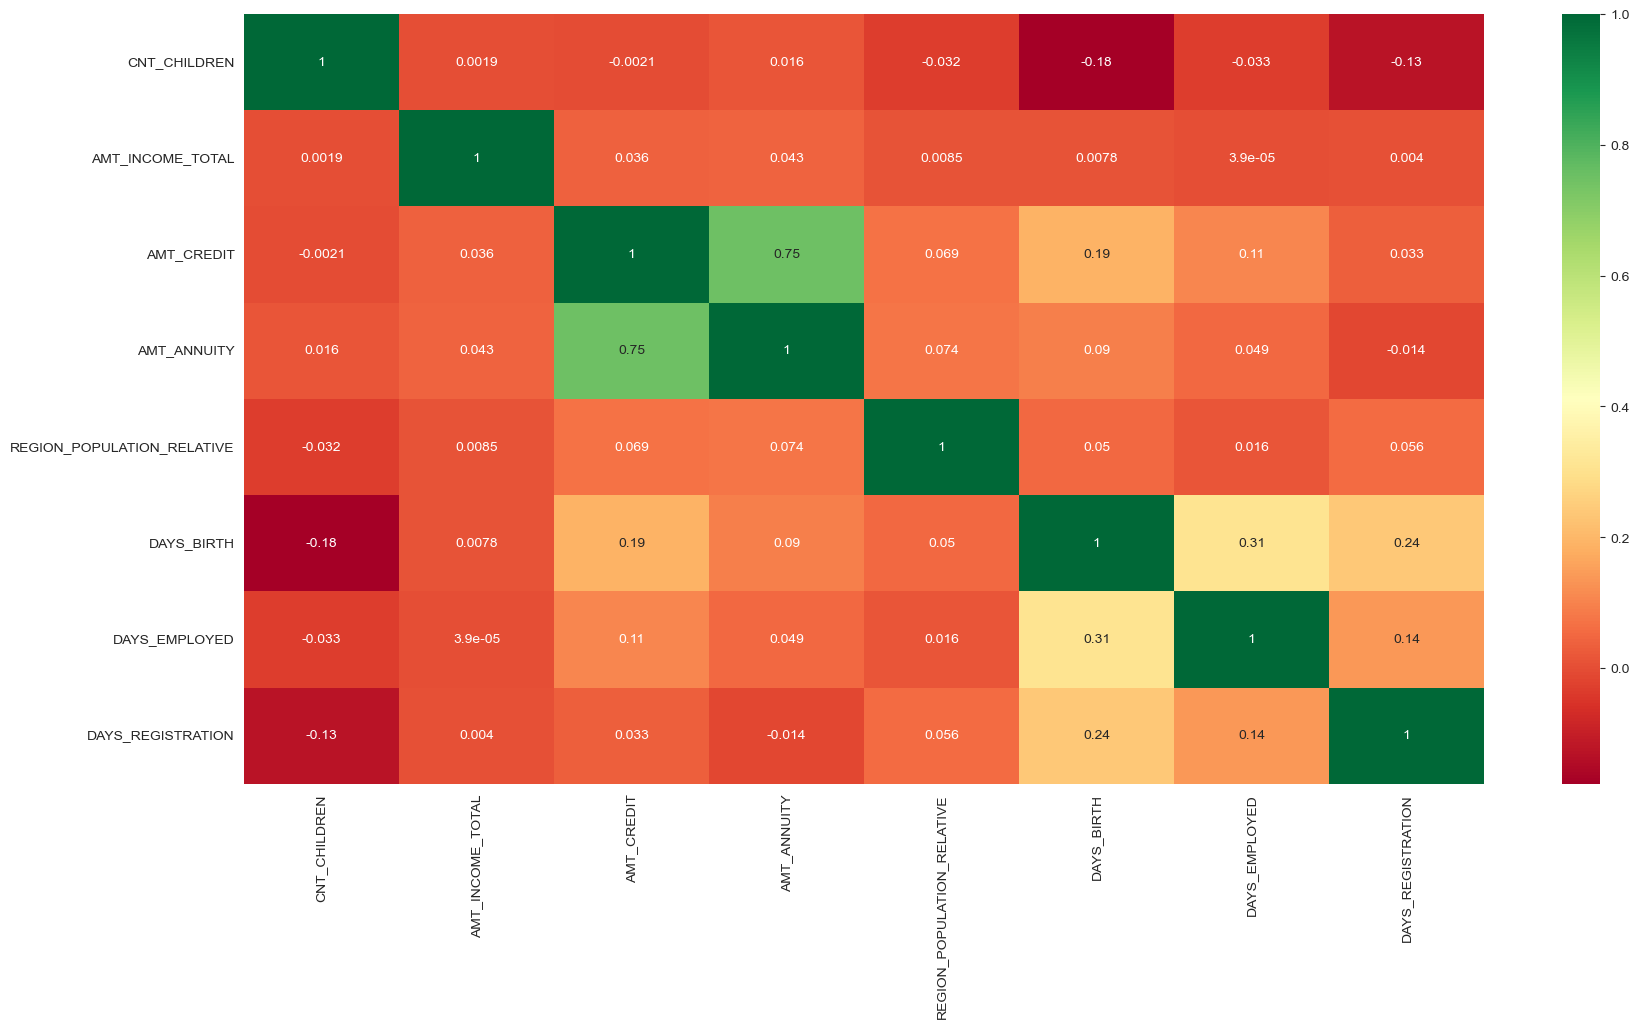

Observations for Target 1:
Most of the values are negatively correlated


In [76]:
t0=target_0.loc[:,['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION']]
t0_corr=t0.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(t0_corr, cmap="RdYlGn",annot=True)
plt.show()
print("Observations:")
print("Amt_Income_Total  is not that much connected to Days_Employed, which means that no. of days employed is not much related to Income earned by that person")
print("CNT_Children is inversely proprtional to DAYS_BIRTH, which means old people have less children")
print("Amt_Annuity is related to Amt_Credit, higher the credibility higher the annuity")
t1=target_1.loc[:,['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION']]
t1_corr=t1.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(t1_corr, cmap="RdYlGn",annot=True)
plt.show()
print("Observations for Target 1:")
print("Most of the values are negatively correlated")

## Bivariate Numerical Analysis for Variables

<font style="color:purple;font-weight:700;font-size:15px">CREDIT AMOUNT VS EDUCATION STATUS VS NAME FAMILY STATUS</font>

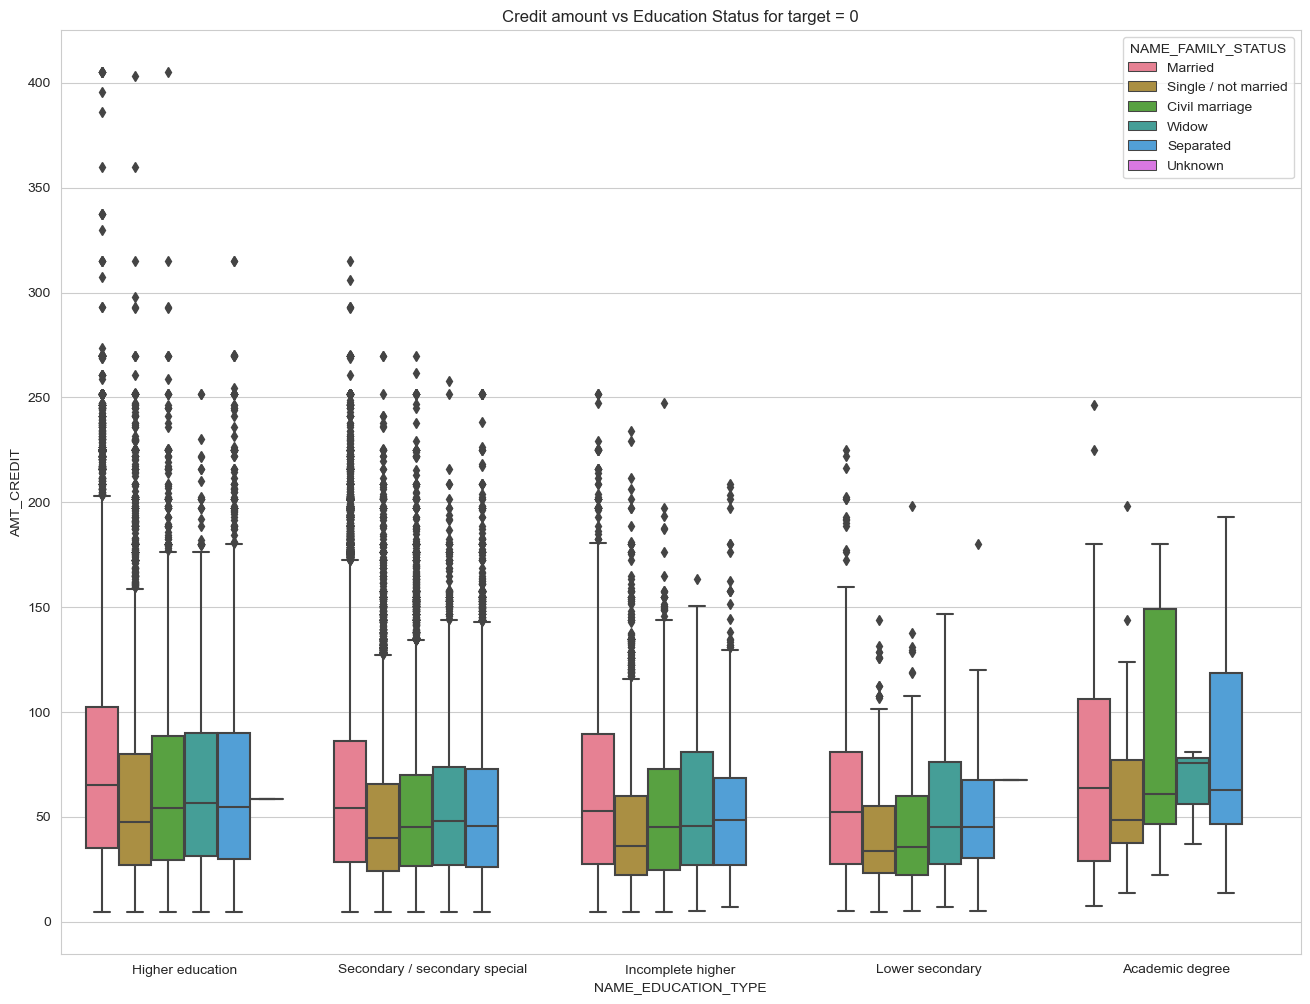

Observations for Target 0:
In most of the cases high amount is credited by the people who are married
People with status married and single are having high outliers.
People with higher education and who are also married has high probability of crediting
People with civil marriage are also crediting good amount


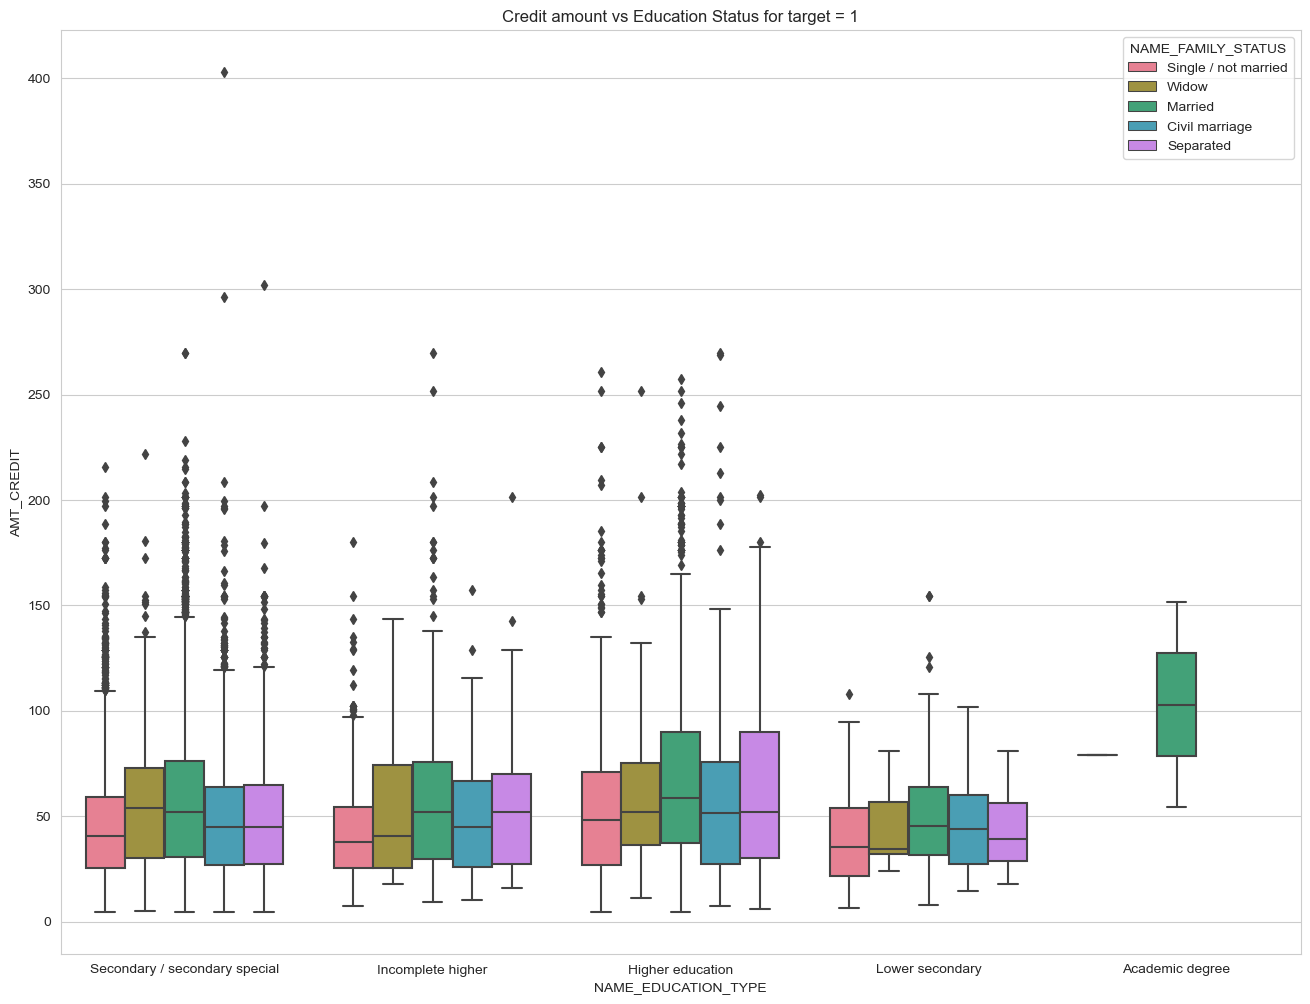

Observations for Target 1:
People with academic degree has least chances of being defaulter, condition- they should not be from the civil marriage status 
People with family status marriage has high chances of being defaulter
We can conclude that being married or not being married has nothing to do with amount crediting capacity


In [81]:
plt.figure(figsize=(16,12))
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette='husl')
plt.title('Credit amount vs Education Status for target = 0')
plt.show()
print("Observations for Target 0:")
print("In most of the cases high amount is credited by the people who are married")
print("People with status married and single are having high outliers.")
print("People with higher education and who are also married has high probability of crediting")
print("People with civil marriage are also crediting good amount")
plt.figure(figsize=(16,12))
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette='husl')
plt.title('Credit amount vs Education Status for target = 1')
plt.show()
print("Observations for Target 1:")
print("People with academic degree has least chances of being defaulter, condition- they should not be from the civil marriage status ")
print("People with family status marriage has high chances of being defaulter")
print("We can conclude that being married or not being married has nothing to do with amount crediting capacity")

<font style="color:purple;font-weight:700;font-size:15px">INCOME AMOUNT VS EDUCATION STATUS VS NAME FAMILY STATUS</font>

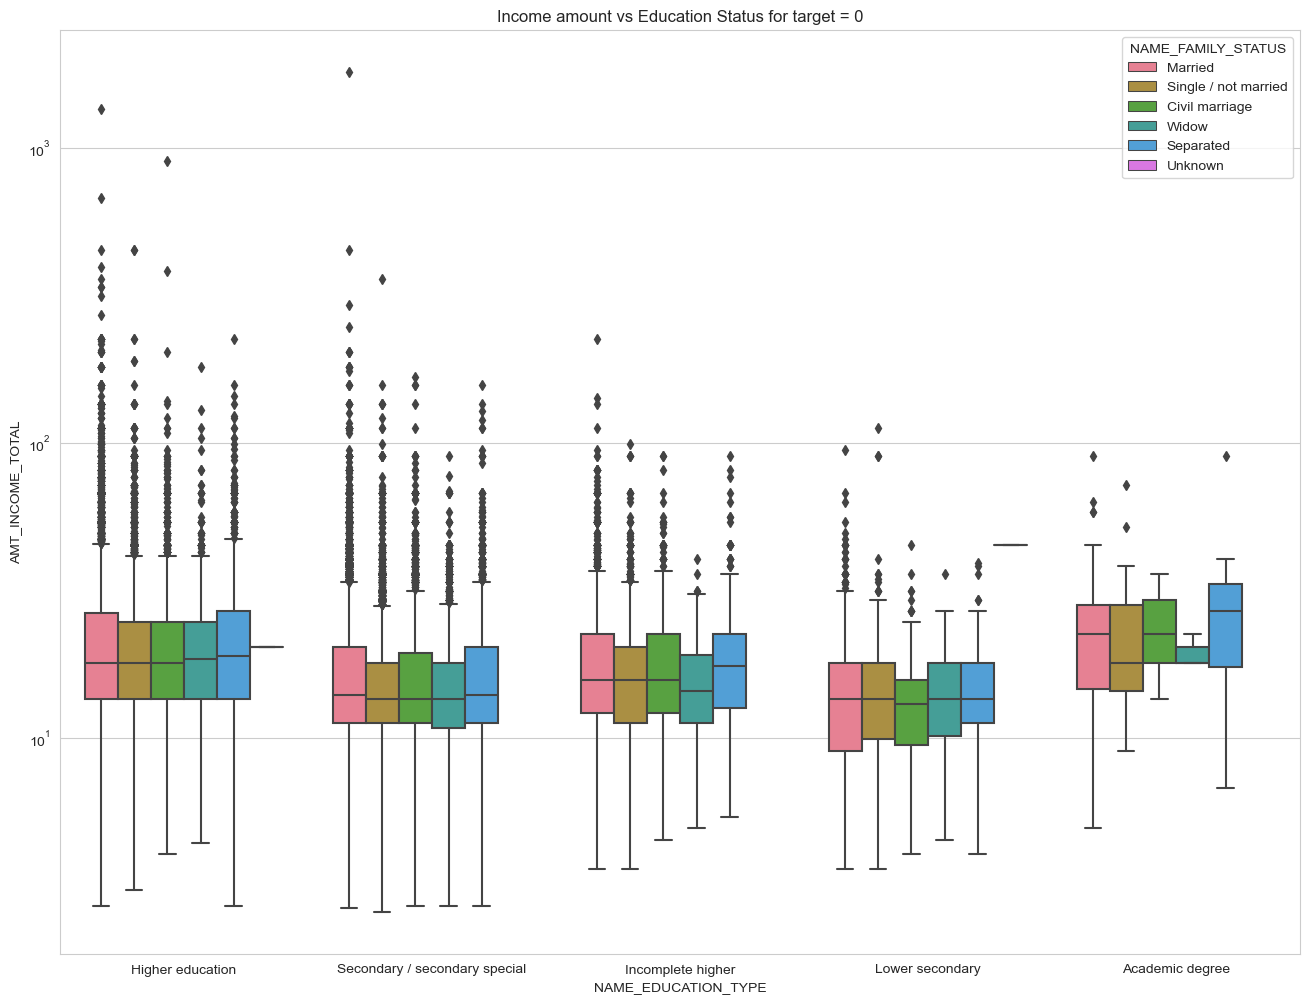

Observations for Target 0:
People with academic degree have high income
In all the cases people who are separated have high income, may be because they get more time focussing on their careers
People who are married have most number of outliers, indicating married people income range varies person to person


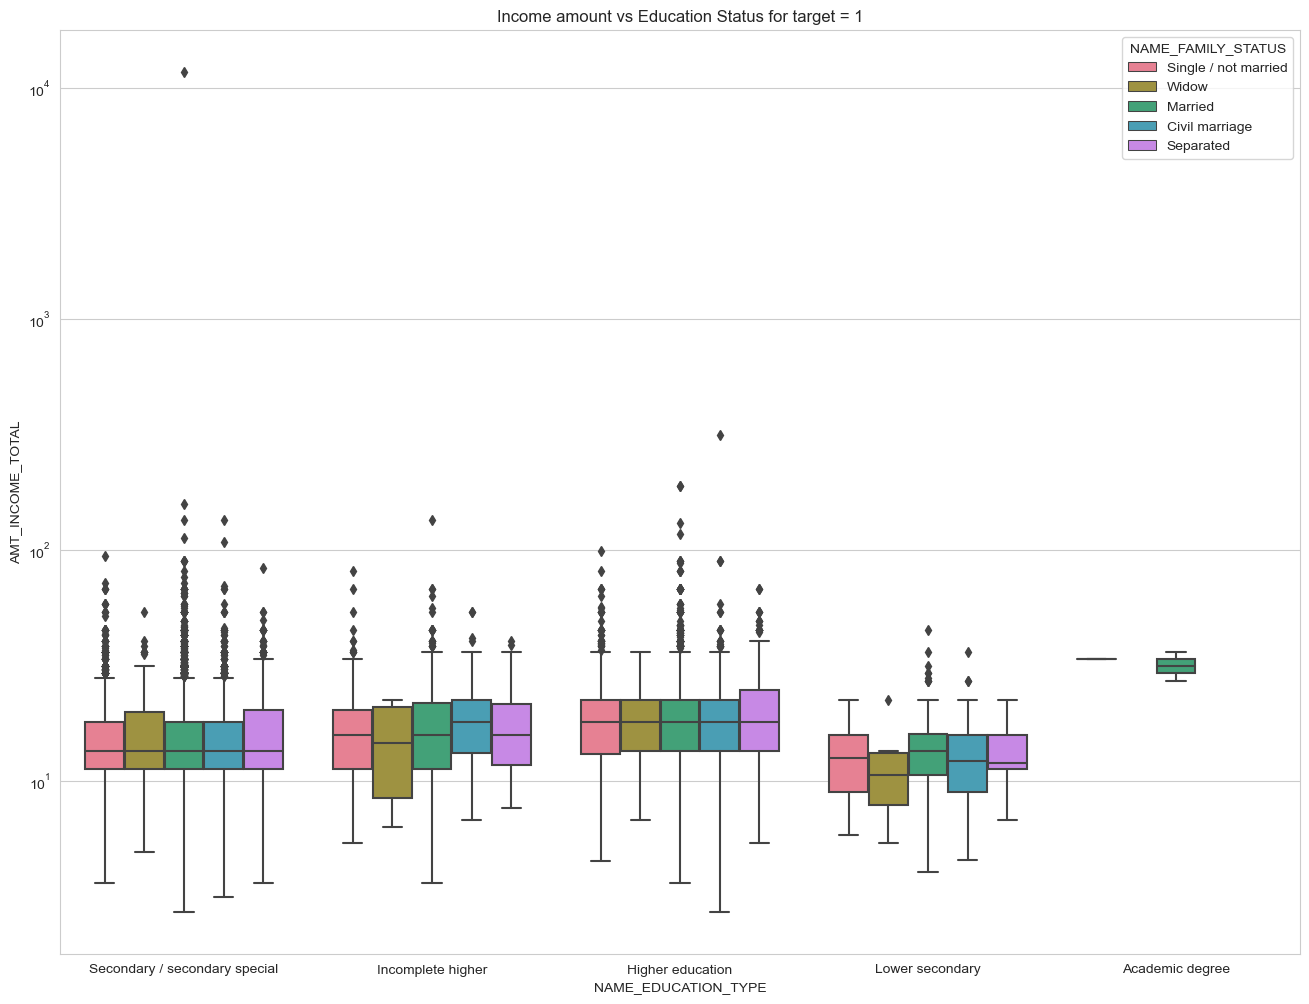

Observations for Target 1:
People with academic degree has least chances of being defaulter, condition- they should not be from the civil marriage status 
People with higher education have high income range


In [50]:
plt.figure(figsize=(16,12))
sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v',palette='husl')
plt.title('Income amount vs Education Status for target = 0')
plt.yscale('log')
plt.show()
print("Observations for Target 0:")
print("People with academic degree have high income")
print("In all the cases people who are separated have high income, may be because they get more time focussing on their careers")
print("People who are married have most number of outliers, indicating married people income range varies person to person")
plt.figure(figsize=(16,12))
sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v',palette='husl')
plt.title('Income amount vs Education Status for target = 1')
plt.yscale('log')
plt.show()
print("Observations for Target 1:")
print("People with academic degree has least chances of being defaulter, condition- they should not be from the civil marriage status ")
print("People with higher education have high income range")

# Previous application

In [51]:
prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [52]:
null_=prev_app.isnull().sum()/len(prev_app)*100
null30=null_[null_>30]
prev_app=prev_app.drop(columns=(null30.index))
prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,...,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,...,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,...,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,...,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [53]:
prev_app.isnull().sum()/len(prev_app)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [54]:
prev_app=prev_app.drop(prev_app[prev_app['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_app=prev_app.drop(prev_app[prev_app['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_app=prev_app.drop(prev_app[prev_app['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

prev_app.shape

(69635, 26)

### Merging Dataframes

In [55]:
new_df=pd.merge(left=application,right=prev_app,how='inner',on='SK_ID_CURR')
new_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,9.00,18.00000,9000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,29.25,66.58920,24592.5,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,36.00,73.33155,39069.0,...,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,18.00,54.00000,27000.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,18.00,54.00000,27000.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51414,456228,0,Cash loans,F,Y,N,0,54.00,54.50400,35617.5,...,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,24.0,middle,Cash Street: middle
51415,456236,0,Cash loans,M,Y,Y,0,58.50,157.50000,43443.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
51416,456244,0,Cash loans,F,N,Y,0,26.10,130.38120,35982.0,...,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high
51417,456245,0,Cash loans,F,N,Y,3,8.10,26.95500,11871.0,...,New,XNA,Cash,walk-in,Country-wide,21,Connectivity,12.0,high,Cash Street: high


In [56]:
new_df.dtypes

SK_ID_CURR                int64
TARGET                    int64
NAME_CONTRACT_TYPE_x     object
CODE_GENDER              object
FLAG_OWN_CAR             object
                         ...   
SELLERPLACE_AREA          int64
NAME_SELLER_INDUSTRY     object
CNT_PAYMENT             float64
NAME_YIELD_GROUP         object
PRODUCT_COMBINATION      object
Length: 101, dtype: object

### Contract_status : Approved/Refused/Cancelled/Unused Offer with Purposes

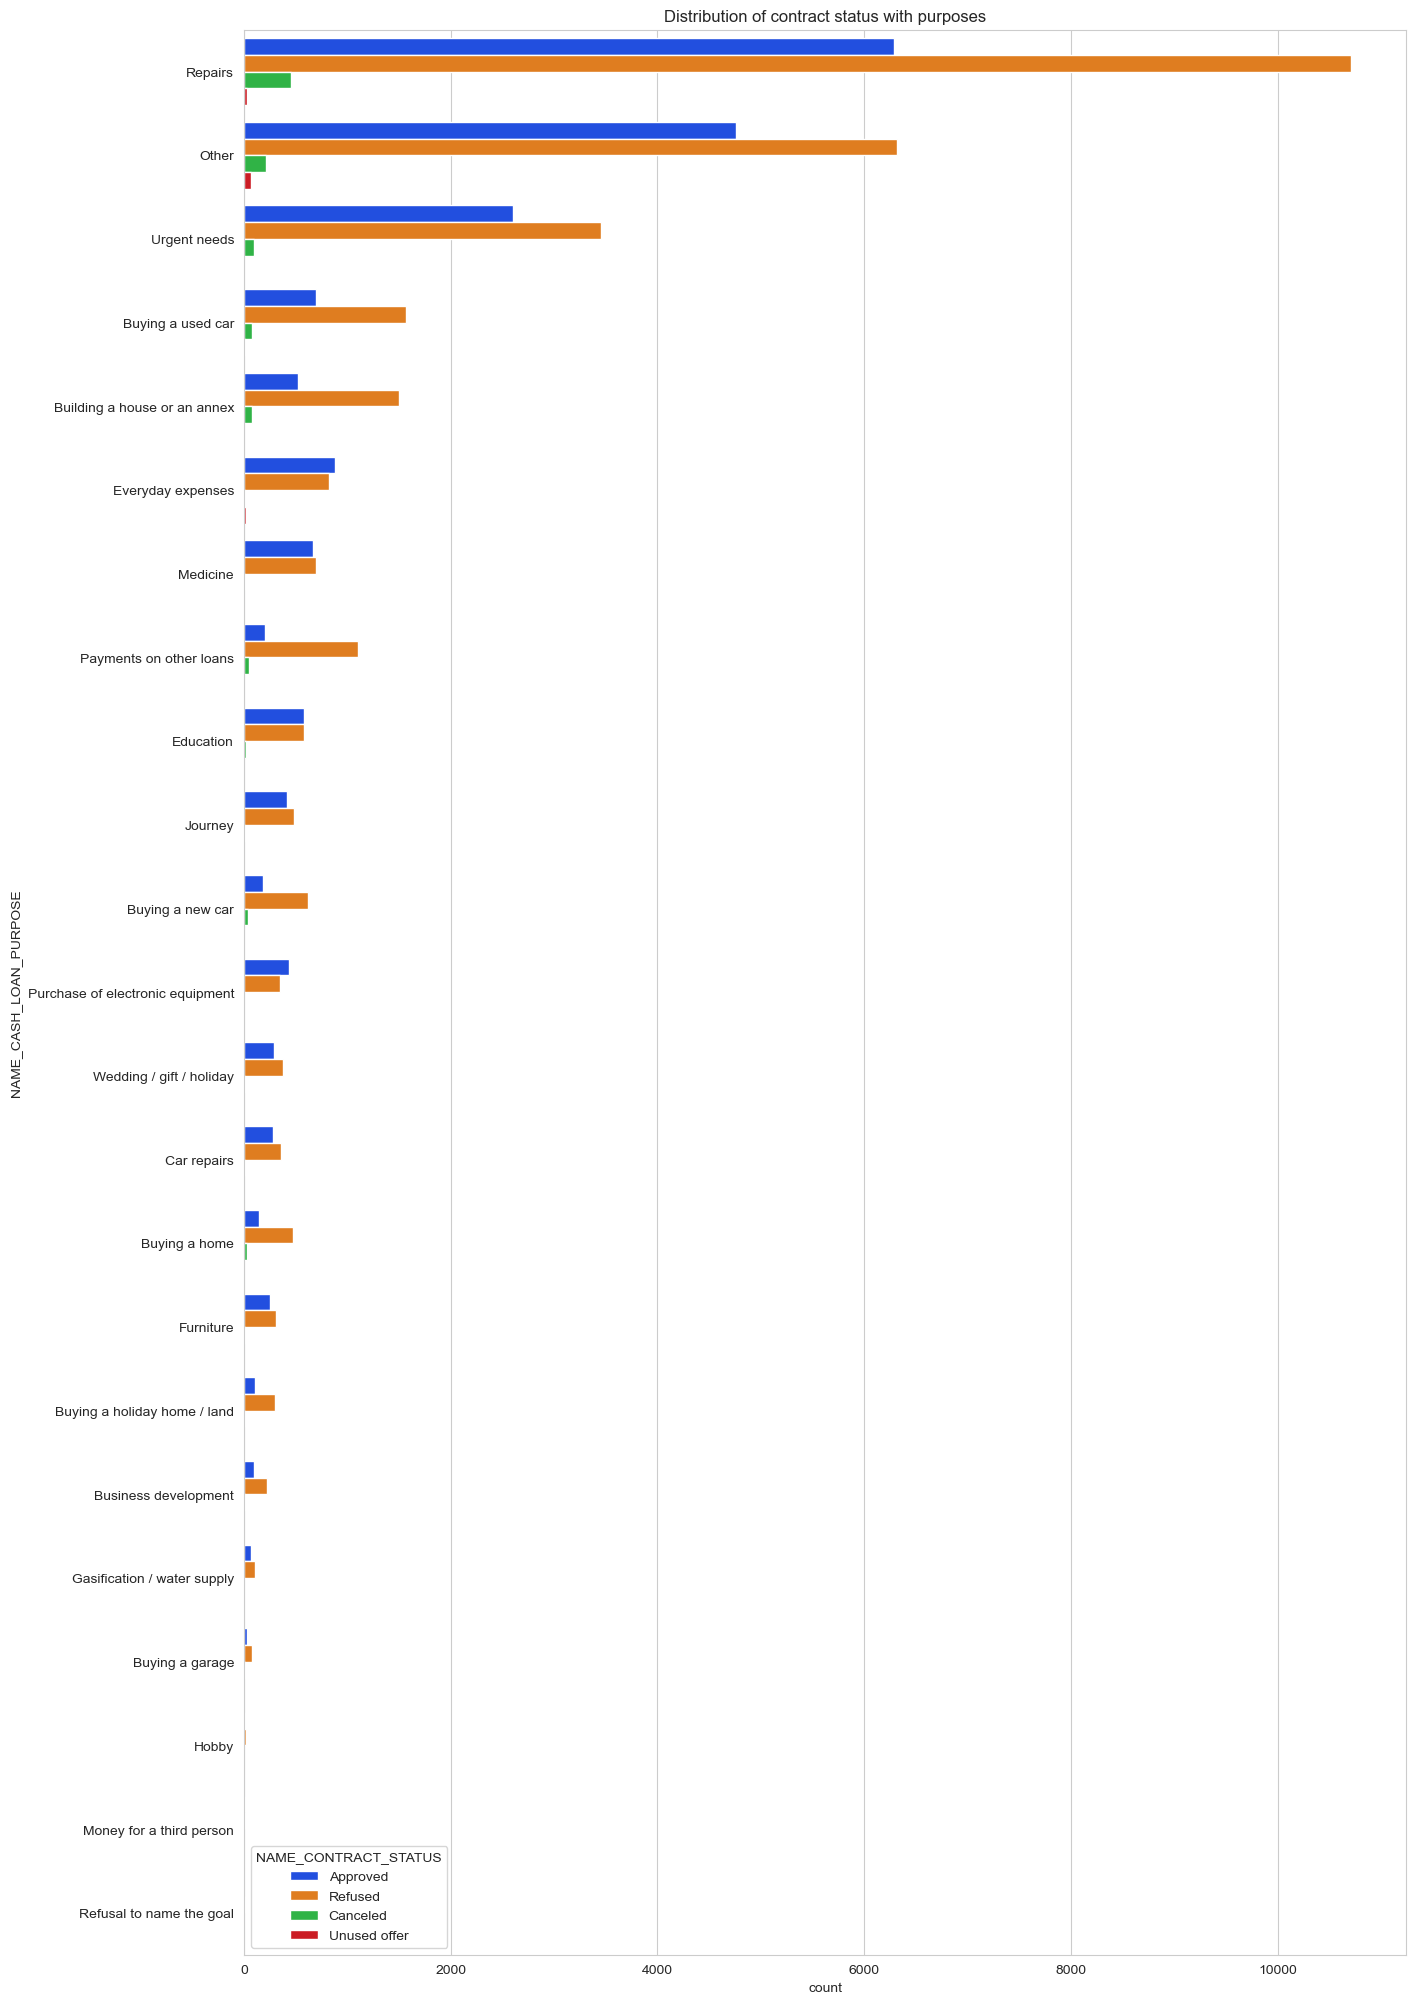

Maximum number of refusals and prrovals are done for repairs.
Very few people have taken loan for their hobbies.
Unused offers are very less in count


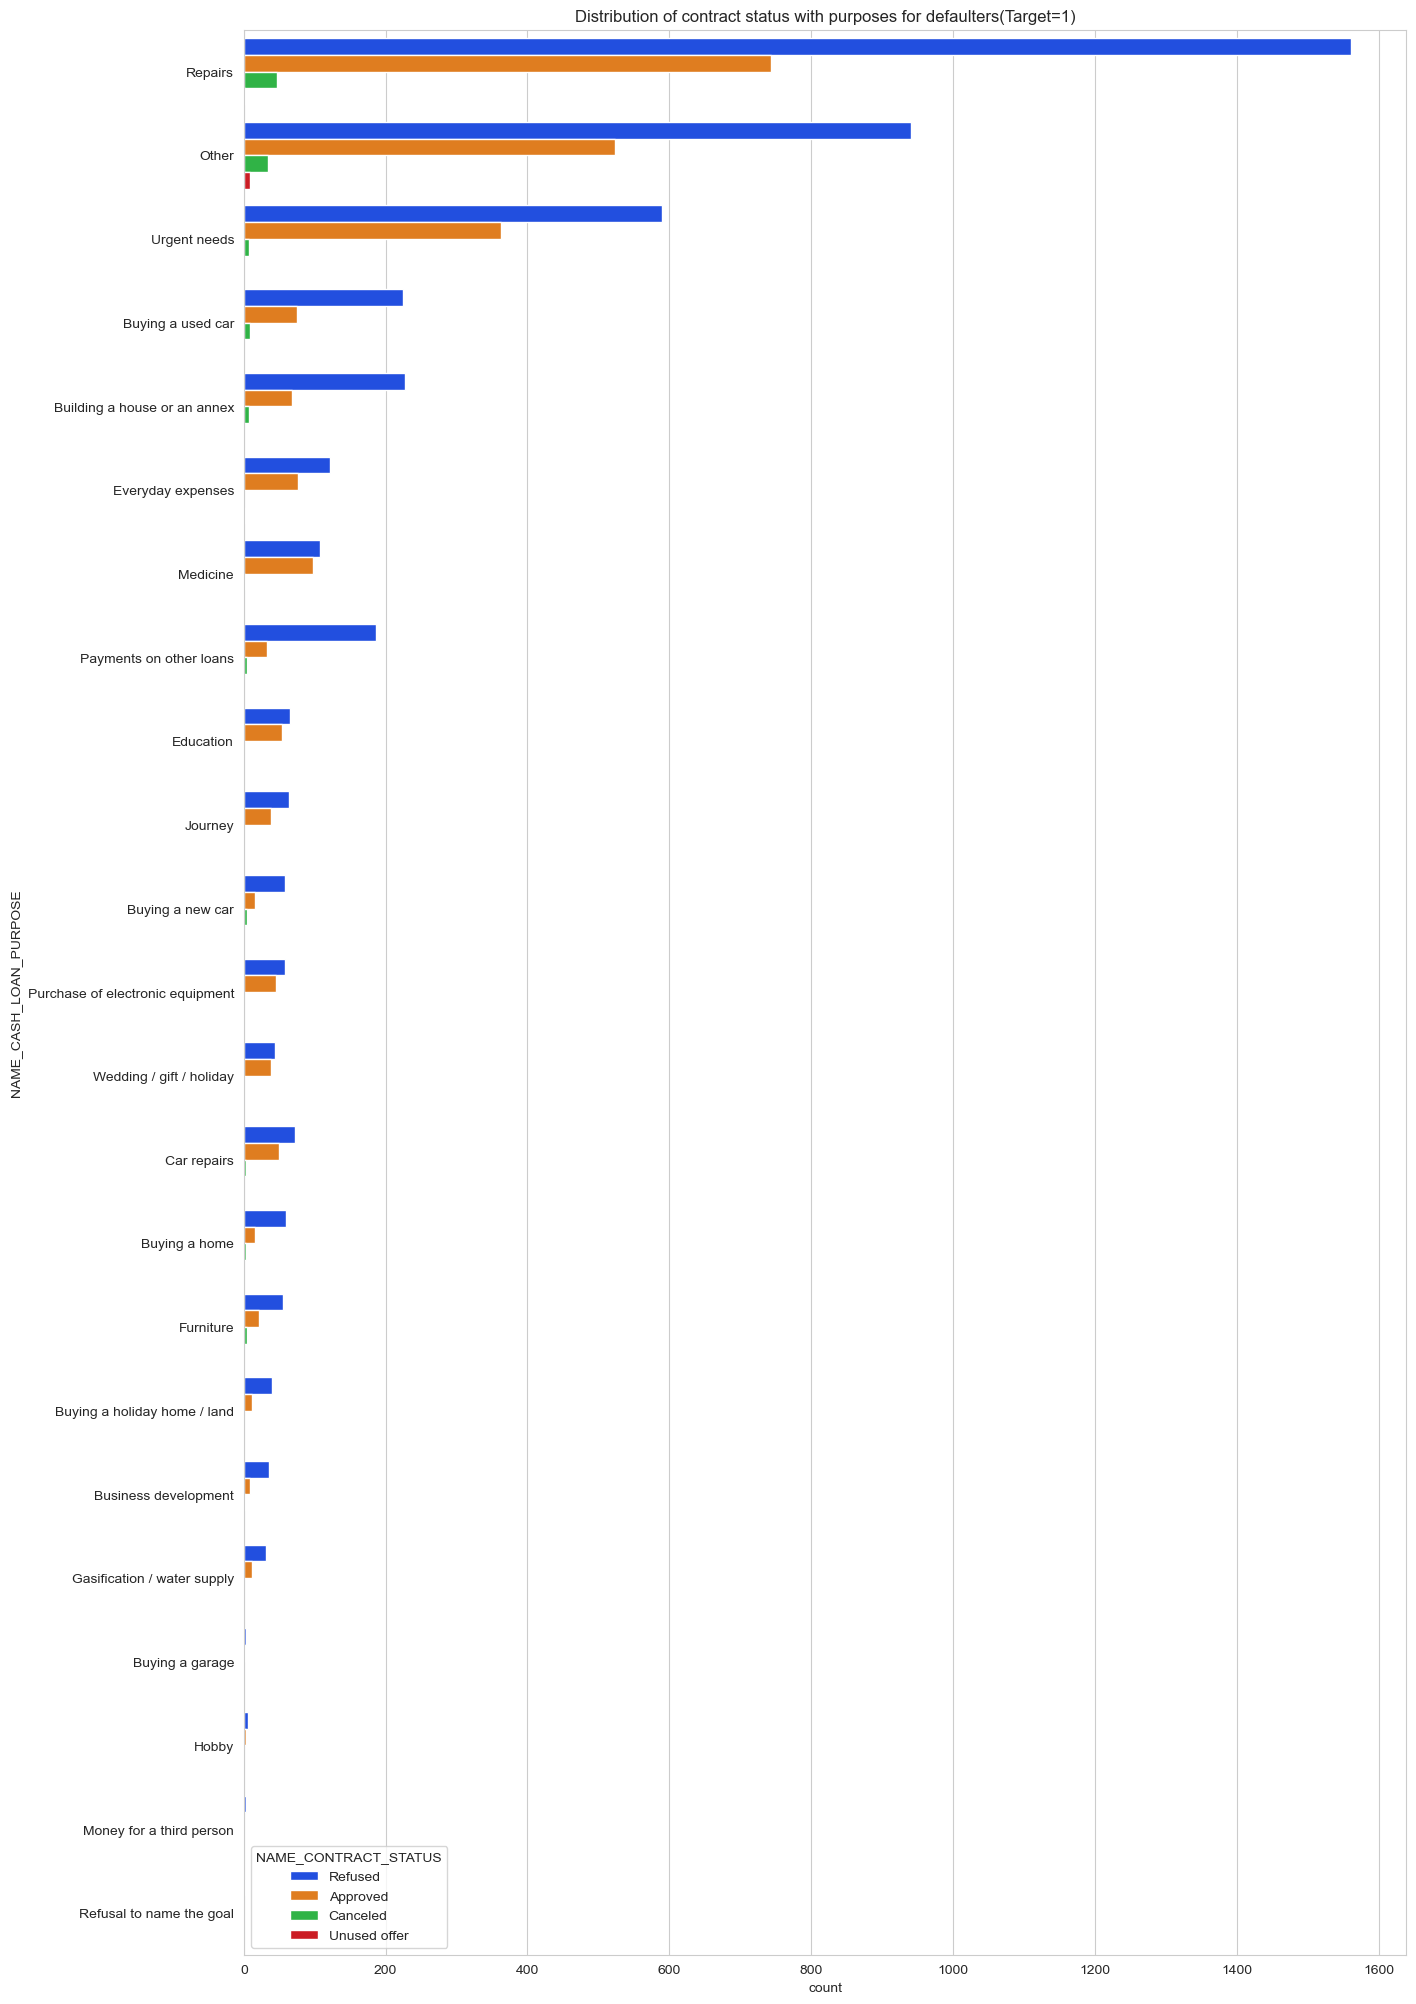

We can see that refusals are maximum for each category, which means that in most of the cases analysers are analyzing correctly abou the defaulters
Not the maximum number, but many loans are approved for defaulters


In [86]:
plt.figure(figsize=(15,25))
sns.countplot(data = new_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='bright') 

plt.title('Distribution of contract status with purposes')
plt.show()
print("Maximum number of refusals and prrovals are done for repairs.")
print("Very few people have taken loan for their hobbies.")
print("Unused offers are very less in count")

defaulters_in_new_dataframe=new_df[new_df["TARGET"]==1]
plt.figure(figsize=(15,25))
sns.countplot(data = defaulters_in_new_dataframe, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='bright') 
plt.title('Distribution of contract status with purposes for defaulters(Target=1)')
plt.show()
print("We can see that refusals are maximum for each category, which means that in most of the cases analysers are analyzing correctly abou the defaulters")
print("Not the maximum number, but many loans are approved for defaulters")

# THE END